# t-SNE (t-distributed Stochastic Neighbor Embedding) dimensionality reduction sample

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


digits = load_digits()

In [2]:
print(digits.data.shape)
print(digits.data)

(1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


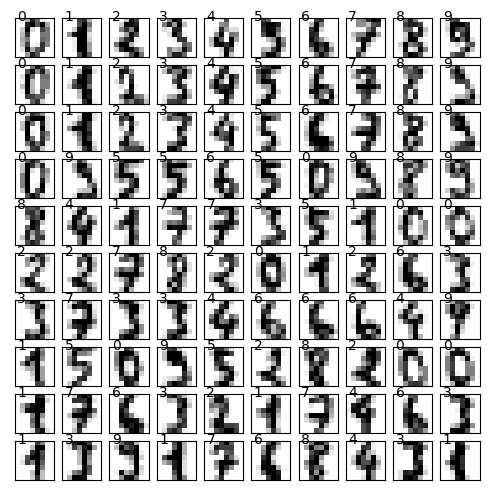

In [3]:
fig, axes = plt.subplots(
    10,
    10,
    figsize=(6, 6),
    subplot_kw={
        'xticks': [],
        'yticks': []
    }
)

for i, ax in enumerate(axes.flat):
    ax.imshow(
        digits.images[i],
        cmap='binary',
        interpolation='nearest'
    )
    ax.text(
        0,
        0,
        str(digits.target[i])
    )

In [4]:
def plot_classification_result(x_fitted, title: str):
    """Plot data classification result.
    """
    for l in digits.target_names:
        is_same_digit: bool = digits.target == l
        plt.scatter(
            x_fitted[is_same_digit, 0],
            x_fitted[is_same_digit, 1],
            label=f'{l}'
        )
        plt.legend()

    plt.suptitle(title)
    plt.show()

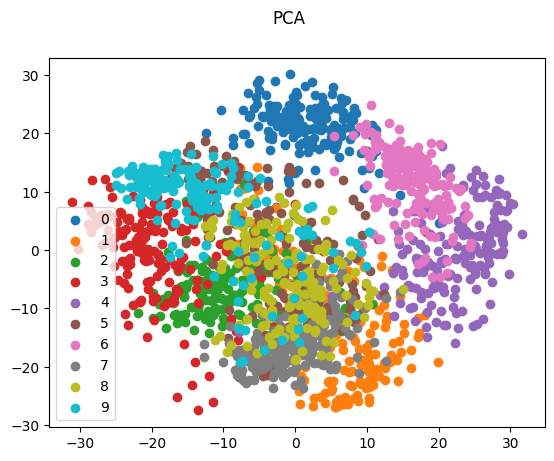

In [5]:
# Visualization using PCA
pca = PCA(n_components=2)
X = pca.fit_transform(digits.data)

plot_classification_result(X, 'PCA')

- It is not classified by number well.
  - PCA is not able to handle non-linear data.

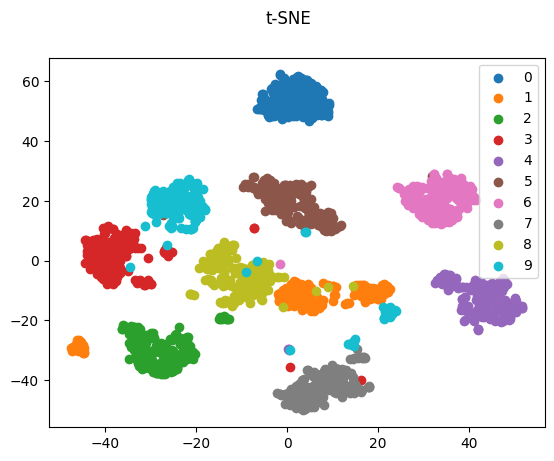

In [6]:
# Visualization using t-SNE
tsne = TSNE(
    n_components=2,
    random_state=0
)
X_tsne = tsne.fit_transform(digits.data)

plot_classification_result(X_tsne, 't-SNE')